<a href="https://colab.research.google.com/github/ale-nunes/Data-Science-e-Machine-Learning/blob/master/regress%C3%A3o_linear_checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#import Tkinter
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [0]:
path = "/home/alecio/PycharmProjects/machine_learning/machine/ipython-notebooks-master/data/ex1data1.txt"
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])
print data.head()
print data.describe()

   Population   Profit
0      6.1101  17.5920
1      5.5277   9.1302
2      8.5186  13.6620
3      7.0032  11.8540
4      5.8598   6.8233
       Population     Profit
count   97.000000  97.000000
mean     8.159800   5.839135
std      3.869884   5.510262
min      5.026900  -2.680700
25%      5.707700   1.986900
50%      6.589400   4.562300
75%      8.578100   7.046700
max     22.203000  24.147000


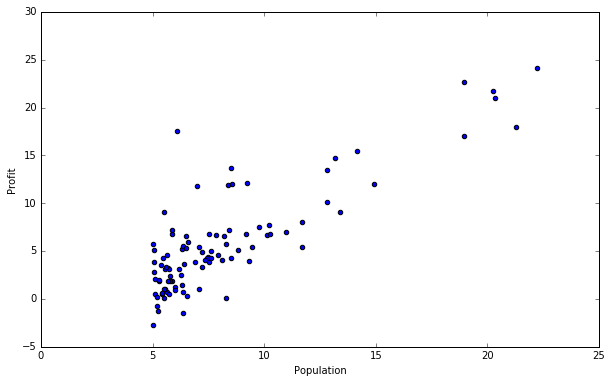

In [0]:
data.plot(kind='scatter', x='Population', y='Profit', figsize=(10,6))
plt.show()

In [0]:
#erro quadratico
def computeCost(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

In [0]:
#anexar uma coluna a frente do conjunto de dados
# append a ones column to the front of the data set
data.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

In [0]:
# convert from data frames to numpy matrices
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))
X.shape, theta.shape, y.shape
computeCost(X, y, theta)

32.072733877455669

In [0]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)

    for i in range(iters):
        error = (X * theta.T) - y

        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))

        theta = temp
        cost[i] = computeCost(X, y, theta)

    return theta, cost

In [0]:
# initialize variables for learning rate and iterations
alpha = 0.01
iters = 1000

# perform gradient descent to "fit" the model parameters
g, cost = gradientDescent(X, y, theta, alpha, iters)

computeCost(X, y, g)

x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = g[0, 0] + (g[0, 1] * x)

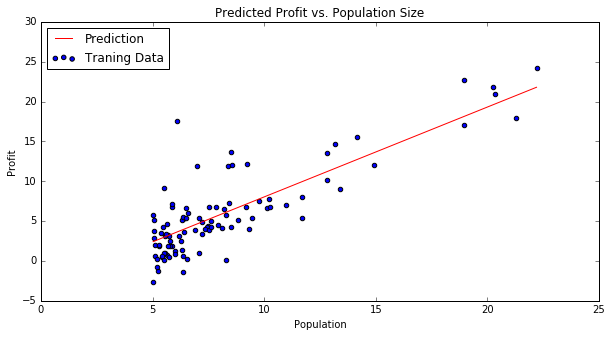

In [0]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')

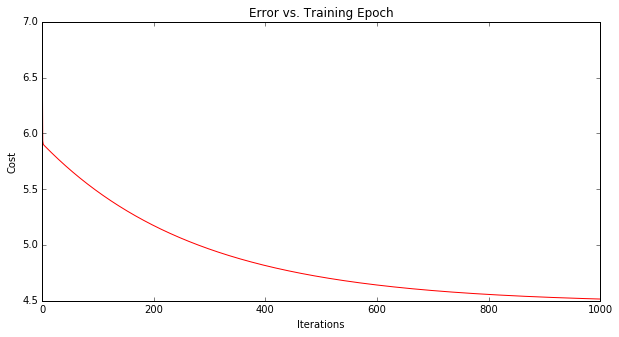

In [0]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()